# prognozy dochodów na 2021

In [1]:
import pandas as pd

In [2]:
data_path_gminy = "../gminy.csv"

In [3]:
df_gminy = pd.read_csv(data_path_gminy, sep=";", decimal=',')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Zostaw tylko te kolumny, które zawierają informacje o dochodach

In [4]:
df_gminy[df_gminy.Kategoria == 'Dochody per capita']

,Kategoria,Kod,Nazwa,Zmienna,Rok,Wartosc,Jednostka miary,Atrybut,Unnamed: 8
1620238,Dochody per capita,0,POLSKA,ogółem,2002,1663.00,zł,NaN,NaN
1620239,Dochody per capita,0,POLSKA,ogółem,2003,1662.00,zł,NaN,NaN
1620240,Dochody per capita,0,POLSKA,ogółem,2004,1887.00,zł,NaN,NaN
1620241,Dochody per capita,0,POLSKA,ogółem,2005,2151.00,zł,NaN,NaN
1620242,Dochody per capita,0,POLSKA,ogółem,2006,2431.28,zł,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1676226,Dochody per capita,3263011,Świnoujście (1),ogółem,2016,8043.11,zł,NaN,NaN
1676227,Dochody per capita,3263011,Świnoujście (1),ogółem,2017,8082.01,zł,NaN,NaN
1676228,Dochody per capita,3263011,Świnoujście (1),ogółem,2018,9170.99,zł,NaN,NaN
1676229,Dochody per capita,3263011,Świnoujście (1),ogółem,2019,7860.86,zł,NaN,NaN


ustaw rok jako index

In [5]:
df_gminy = df_gminy[(df_gminy.Kategoria == 'Dochody per capita') & (df_gminy.Nazwa == "POLSKA")]
df_gminy['Rok'] = pd.to_datetime(df_gminy['Rok'], format='%Y')
df_gminy = df_gminy.set_index('Rok')
df_gminy

,Kategoria,Kod,Nazwa,Zmienna,Wartosc,Jednostka miary,Atrybut,Unnamed: 8
Rok,,,,,,,,
2002-01-01,Dochody per capita,0,POLSKA,ogółem,1663.00,zł,NaN,NaN
2003-01-01,Dochody per capita,0,POLSKA,ogółem,1662.00,zł,NaN,NaN
2004-01-01,Dochody per capita,0,POLSKA,ogółem,1887.00,zł,NaN,NaN
2005-01-01,Dochody per capita,0,POLSKA,ogółem,2151.00,zł,NaN,NaN
2006-01-01,Dochody per capita,0,POLSKA,ogółem,2431.28,zł,NaN,NaN
2007-01-01,Dochody per capita,0,POLSKA,ogółem,2725.28,zł,NaN,NaN
2008-01-01,Dochody per capita,0,POLSKA,ogółem,2932.15,zł,NaN,NaN
2009-01-01,Dochody per capita,0,POLSKA,ogółem,3019.64,zł,NaN,NaN
2010-01-01,Dochody per capita,0,POLSKA,ogółem,3276.40,zł,NaN,NaN


własna funkcja do oceny modeli

In [6]:
import sklearn.metrics as metrics
import numpy as np

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

data engeneering: stwórz dodatkowe kolumny informujące o dochodach w poprzednim roku i różnicy pomiędzy nim a teraźniejszością

In [7]:
# creating new dataframe from consumption column
dochody = df_gminy[['Wartosc']]
# inserting new column with yesterday's consumption values
dochody.loc[:,'Yesterday'] = dochody.loc[:,'Wartosc'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
dochody.loc[:,'Yesterday_Diff'] = dochody.loc[:,'Yesterday'].diff()
# dropping NAs
dochody = dochody.dropna()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


podziel zbiór danych na treningowy i testowy

In [8]:
X_train = dochody[:'2018'].drop(['Wartosc'], axis = 1)
y_train = dochody[:'2018'].reset_index().drop(['Yesterday', 'Yesterday_Diff', 'Rok'], axis = 1)
X_test = dochody[:'2019'].drop(['Wartosc'], axis = 1)
y_test = dochody[:'2019'].reset_index().drop(['Yesterday', 'Yesterday_Diff', 'Rok'], axis = 1)

## Wybór modelu

Znajdź najlepszy model

LR: 0.326795 (0.272192)
NN: 0.675496 (0.150557)
KNN: -6.707606 (7.076182)
RF: -7.071456 (5.520678)
SVR: -29.475276 (16.251868)


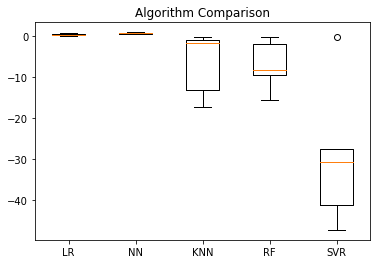

In [9]:
from matplotlib import pyplot as plt
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation

    cv_results = cross_val_score(model, X_train, y_train.values.ravel(), scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show(
)#%%

In [10]:
from sklearn.metrics import make_scorer
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better = False)

## Hyperparameters tuning

znajdź najlepsze parametry dla wybranego modelu przy pomocy metody grid search

In [11]:
from sklearn.model_selection import GridSearchCV
model = MLPRegressor(solver = 'lbfgs')
param_search = {
    'hidden_layer_sizes': [15, 25, 30, 40, 60],
    'max_iter': [i for i in range(100, 130, 5)],
    'learning_rate' : ['constant', 'invscaling', 'adaptive']
}
tscv = TimeSeriesSplit(n_splits=2)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train.values.ravel())
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_mult

pokaż najlepszy model

In [12]:
best_model

MLPRegressor(hidden_layer_sizes=30, learning_rate='adaptive', max_iter=120,
             solver='lbfgs')

## model evaluation

In [13]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.9933
mean_squared_log_error:  0.0005
r2:  0.9932
MAE:  72.6739
MSE:  8499.6277
RMSE:  92.1934


In [14]:
y_pred

array([1917.84173861, 2104.96890872, 2398.41143682, 2689.17052671,
       2991.38631203, 3123.9943082 , 3292.06641645, 3505.83852037,
       3630.38285257, 3811.78668866, 4049.47748757, 4165.60298008,
       4426.36406411, 4978.46469085, 5228.22367192, 5753.27125254])

In [15]:
best_model.predict(X_test)

array([1917.84173861, 2104.96890872, 2398.41143682, 2689.17052671,
       2991.38631203, 3123.9943082 , 3292.06641645, 3505.83852037,
       3630.38285257, 3811.78668866, 4049.47748757, 4165.60298008,
       4426.36406411, 4978.46469085, 5228.22367192, 5753.27125254])

## final model training

stwórz zestaw treningowy z całego zbioru do trenowania ostatecznego modelu produkcyjnego

In [16]:
X_train_prod = dochody.drop(['Wartosc'], axis = 1)
y_train_prod = dochody.reset_index().drop(['Yesterday', 'Yesterday_Diff', 'Rok'], axis = 1)
X_train_prod

,Yesterday,Yesterday_Diff
Rok,,
2004-01-01,1662.00,-1.00
2005-01-01,1887.00,225.00
2006-01-01,2151.00,264.00
2007-01-01,2431.28,280.28
2008-01-01,2725.28,294.00
2009-01-01,2932.15,206.87
2010-01-01,3019.64,87.49
2011-01-01,3276.40,256.76
2012-01-01,3444.21,167.81


In [17]:
model_prod = best_model.fit(X_train_prod, y_train_prod.values.ravel())
model_prod

MLPRegressor(hidden_layer_sizes=30, learning_rate='adaptive', max_iter=120,
             solver='lbfgs')

In [18]:
X_predict = dochody
# X_predict.loc['2021-01-01', 'Yesterday'] = X_predict.loc['2020-01-01', 'Wartosc']
wartosc = X_predict.loc['2020-01-01', 'Wartosc']
yesterday = X_predict.loc['2020-01-01', 'Yesterday']
diff = wartosc - yesterday

In [19]:
X_predict.loc['2021-01-01', 'Yesterday'] = wartosc
X_predict.loc['2021-01-01', 'Yesterday_Diff'] = diff
X_predict

,Wartosc,Yesterday,Yesterday_Diff
Rok,,,
2004-01-01 00:00:00,1887.00,1662.00,-1.00
2005-01-01 00:00:00,2151.00,1887.00,225.00
2006-01-01 00:00:00,2431.28,2151.00,264.00
2007-01-01 00:00:00,2725.28,2431.28,280.28
2008-01-01 00:00:00,2932.15,2725.28,294.00
2009-01-01 00:00:00,3019.64,2932.15,206.87
2010-01-01 00:00:00,3276.40,3019.64,87.49
2011-01-01 00:00:00,3444.21,3276.40,256.76
2012-01-01 00:00:00,3624.21,3444.21,167.81


In [20]:
predicted_true = X_predict['Wartosc']
X_predict = X_predict.drop('Wartosc', axis = 1)
X_predict

,Yesterday,Yesterday_Diff
Rok,,
2004-01-01 00:00:00,1662.00,-1.00
2005-01-01 00:00:00,1887.00,225.00
2006-01-01 00:00:00,2151.00,264.00
2007-01-01 00:00:00,2431.28,280.28
2008-01-01 00:00:00,2725.28,294.00
2009-01-01 00:00:00,2932.15,206.87
2010-01-01 00:00:00,3019.64,87.49
2011-01-01 00:00:00,3276.40,256.76
2012-01-01 00:00:00,3444.21,167.81


## final prediction

In [21]:
y_pred = model_prod.predict(X_predict)
y_pred

array([1771.15436925, 2077.14217044, 2366.95685262, 2666.95497197,
       2980.61106632, 3171.69514558, 3227.25379547, 3549.31157129,
       3698.72505483, 3891.91917123, 4003.35946244, 4270.08008356,
       4397.12397641, 4993.0630127 , 5327.12009716, 5829.86143233,
       6483.65723044, 7029.80986443])

In [22]:
X_predict['pred_wartosc'] = y_pred
X_predict['true_wartosc'] = predicted_true
X_predict

,Yesterday,Yesterday_Diff,pred_wartosc,true_wartosc
Rok,,,,
2004-01-01 00:00:00,1662.00,-1.00,1771.154369,1887.00
2005-01-01 00:00:00,1887.00,225.00,2077.142170,2151.00
2006-01-01 00:00:00,2151.00,264.00,2366.956853,2431.28
2007-01-01 00:00:00,2431.28,280.28,2666.954972,2725.28
2008-01-01 00:00:00,2725.28,294.00,2980.611066,2932.15
2009-01-01 00:00:00,2932.15,206.87,3171.695146,3019.64
2010-01-01 00:00:00,3019.64,87.49,3227.253795,3276.40
2011-01-01 00:00:00,3276.40,256.76,3549.311571,3444.21
2012-01-01 00:00:00,3444.21,167.81,3698.725055,3624.21


### odpowiedź: przewidywane dochody per capita w 2021 roku

In [23]:
X_predict.loc['2021-01-01'].pred_wartosc

7029.809864428937